# Plot Utils Examples

In [1]:
%matplotlib inline
import dr_gen.analyze.plot_utils as pu
import random

%load_ext autoreload
%autoreload 2

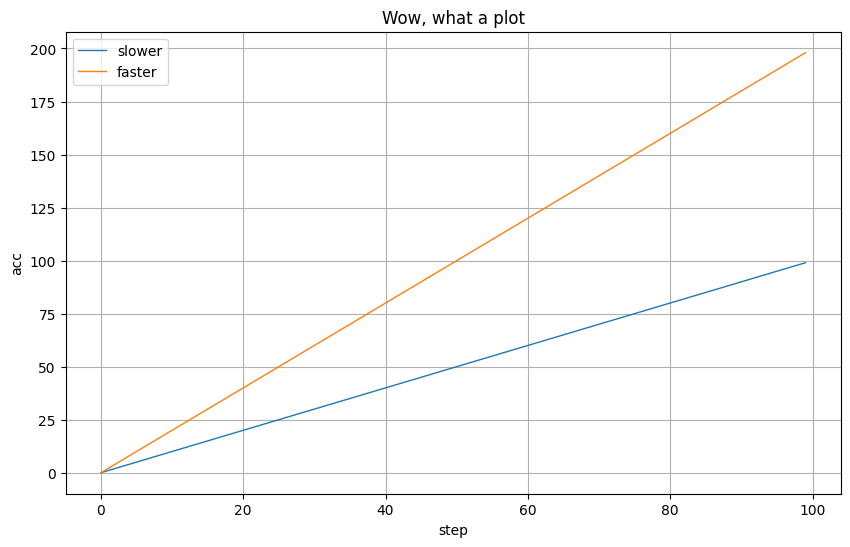

In [2]:
# Test: Make Line Plot
pu.make_line_plot(
    [list(range(100)), [i*2 for i in range(100)]],
    xs=list(range(100)),
    xlabel="step",
    ylabel="acc",
    title="Wow, what a plot",
    labels=["slower", "faster"],
)

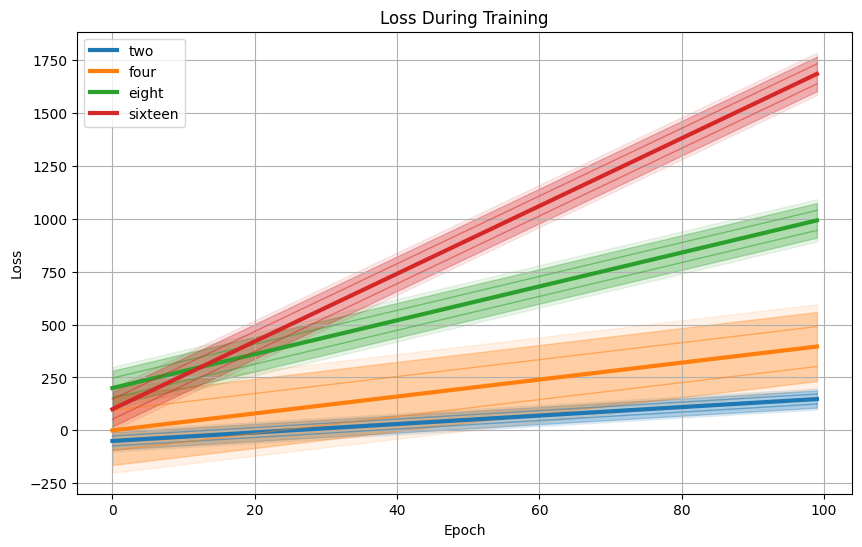

In [3]:
# Test: Make Summary Line Plot
pu.make_summary_line_plot(
    [
        [[i*2 - 100 for i in range(100)], [i*2 - 50 for i in range(100)], [i*2 for i in range(100)]], 
        [[i*4 - 200 for i in range(100)], [i*4 for i in range(100)], [i*4 + 200 for i in range(100)]], 
        [[i*8 + 100 for i in range(100)], [i*8 + 200 for i in range(100)], [i*8 + 300 for i in range(100)]], 
        [[i*16 for i in range(100)], [i*16 + 100 for i in range(100)], [i*16 + 200 for i in range(100)]], 
    ],
    labels=['two', 'four', 'eight', 'sixteen'],
)

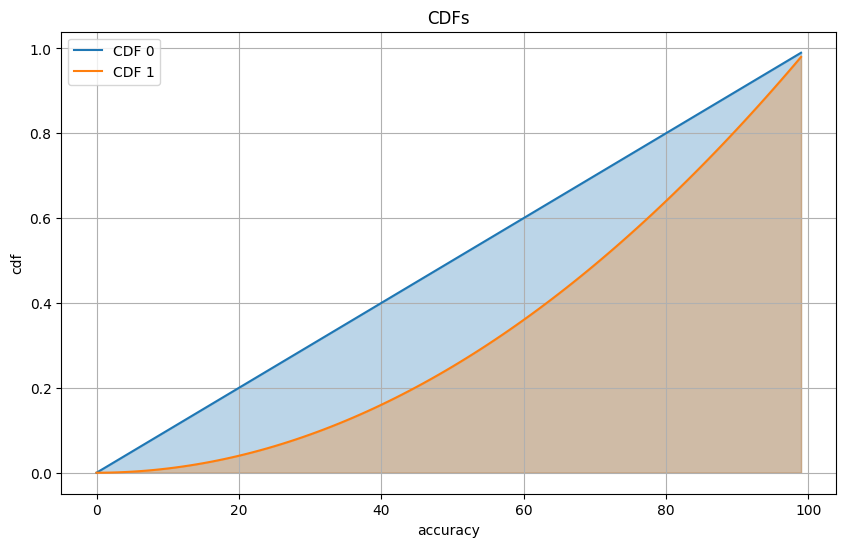

In [4]:
# Test: Make CDF Plot
pu.make_cdfs_plot(
    vals=list(range(100)),
    cdfs=[
        [i / 100.0 for i in range(100)],
        [i*i / (100.0 * 100.0) for i in range(100)],
    ],
)

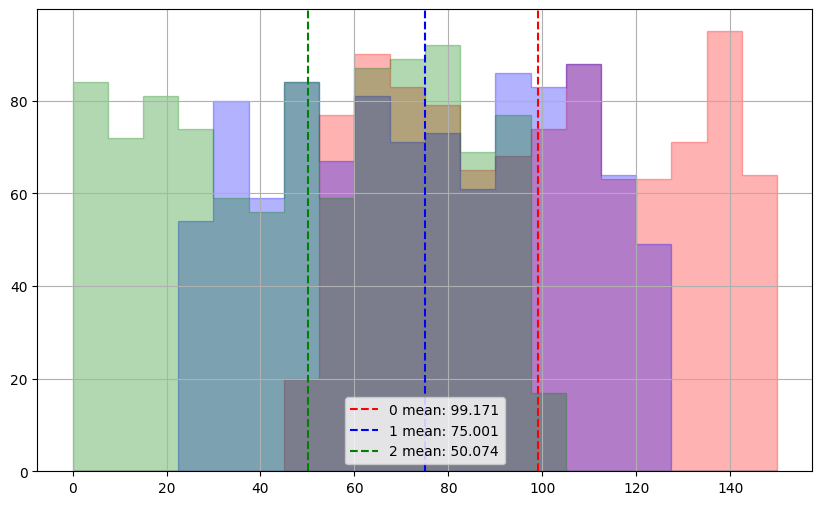

In [5]:
# Test: Make Histogram Plot
vals = [
    [rc + 50 for rc in random.choices(range(100), k=1000)],
    [rc + 25 for rc in random.choices(range(100), k=1000)],
    [rc for rc in random.choices(range(100), k=1000)],
]
means = [sum(v) / len(v) for v in vals]
pu.make_histogram_plot(
    vals,
    means=means,
    hist_range=(0,150),
    nbins=20,
    alpha=0.3,
    labels=[f"{i} mean: {means[i]}" for i in range(len(vals))],
)

# Plot Utils Iteration

In [1]:
%matplotlib inline

from hydra import initialize, compose
from omegaconf import OmegaConf 

import dr_gen.utils.run as ru
import dr_gen.utils.display as dsp

from dr_gen.analyze.run_group import RunGroup
import dr_gen.analyze.result_plotting as rplt

%load_ext autoreload
%autoreload 2

### Setup

In [2]:
with initialize(config_path="../configs/", version_base=None):
    cfg = compose(
        config_name="config.yaml",
        overrides=[
            "paths=mac",
        ]
    )

In [3]:
generator = ru.set_deterministic(cfg.seed)

In [4]:
rg = RunGroup()
rg.load_runs_from_base_dir(cfg.paths.agg_results)
rg.ignore_runs_by_hpms(epochs=180)
print(dsp.make_table(*rg.get_swept_table_data()))

>> 0 / 1288 files failed parsing
>> Updated hpm sweep info
>> Ignoring rid: 1287
>> Updated hpm sweep info
+------+------------+
| Key  |   Values   |
+------+------------+
| Init |   random   |
|      | pretrained |
+------+------------+
|  WD  |  0.00016   |
|      |   1e-05    |
|      |   4e-05    |
|      |   0.0001   |
|      |  6.3e-05   |
|      |  0.00025   |
+------+------------+
|  LR  |    0.16    |
|      |    0.06    |
|      |    0.04    |
|      |    0.01    |
|      |    0.2     |
|      |    0.25    |
|      |    0.1     |
+------+------------+


### Plot Testing